In [1]:
import utils.mnist_reader as um
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import os
import pandas as pd

In [2]:
x_train_all, y_train_all = um.load_mnist('data/fashion', kind='train')
x_test, y_test = um.load_mnist('data/fashion', kind='t10k')

'''
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img=np.reshape(Xtr[i],(28,28))
    plt.imshow(img,cmap=plt.cm.binary)
plt.show()
'''

#
x_train,x_valid=x_train_all[5000:],x_train_all[:5000]
y_train,y_valid=y_train_all[5000:],y_train_all[:5000]

print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(55000, 784)
(55000,)
(5000, 784)
(5000,)


In [3]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled=scaler.fit_transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled=scaler.fit_transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)


In [4]:
def getModel(layers, activations):
    assert len(layers) == len(activations)
    model=keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28,28]))
    for i in range(len(layers)):
        model.add(keras.layers.Dense(layers[i],activation=activations[i]))

        #model.add(keras.layers.Dense(10,activation="sigmoid"))
    model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["acc"])
    return model

all_layers = [[300, 100, 10], [500, 300, 100, 10], [500, 300, 100, 10], [500, 300, 100, 10], [500, 300, 100, 10], [500, 300, 100, 10], [500, 300, 100, 50, 10], [500, 300, 100, 50, 10]]
all_activations = [['relu', 'relu', 'softmax'], ['relu', 'relu', 'sigmoid', 'softmax'], ['relu', 'relu', 'relu', 'sigmoid'], ['relu', 'relu', 'relu', 'softmax'], ['relu', 'softmax', 'relu', 'sigmoid'], ['relu', 'sigmoid', 'relu', 'softmax'], ['relu', 'relu', 'sigmoid', 'relu', 'softmax'], ['relu', 'relu', 'relu', 'relu', 'sigmoid']]
print(all_layers)
print(all_activations)
print(len(all_layers))
print(len(all_activations))

[[300, 100, 10], [500, 300, 100, 10], [500, 300, 100, 10], [500, 300, 100, 10], [500, 300, 100, 10], [500, 300, 100, 10], [500, 300, 100, 50, 10], [500, 300, 100, 50, 10]]
[['relu', 'relu', 'softmax'], ['relu', 'relu', 'sigmoid', 'softmax'], ['relu', 'relu', 'relu', 'sigmoid'], ['relu', 'relu', 'relu', 'relu', 'softmax'], ['relu', 'softmax', 'relu', 'sigmoid'], ['relu', 'sigmoid', 'relu', 'softmax'], ['relu', 'relu', 'sigmoid', 'relu', 'softmax'], ['relu', 'relu', 'relu', 'relu', 'sigmoid']]
8
8


In [5]:
models = []
for i in range(len(all_layers)):
    model = getModel(all_layers[i], all_activations[i])
    models.append(model)
    #model.summary()

AssertionError: 

In [6]:
for model in models:
    model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
____________________________

In [7]:
import datetime
def train_model(model):
    current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    logdir = os.path.join('logs', current_time)
    output_model=os.path.join(logdir,"fashionmnist_model.h5")
    callbacks=[
        keras.callbacks.TensorBoard(log_dir=logdir),
        keras.callbacks.ModelCheckpoint(output_model,save_best_only=True),
        keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)
            ]
    history=model.fit(x_train_scaled,y_train,epochs=30,validation_data=(x_valid_scaled,y_valid),callbacks=callbacks)
    return history

In [8]:
histories = []
accs = []
for model in models:
    history = train_model(model)
    histories.append(history)
    loss,acc=model.evaluate(x_test_scaled,y_test,verbose=0)
    accs.append(acc)
print(acc)

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4623 - acc: 0.8299 - val_loss: 0.3829 - val_acc: 0.8598
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3517 - acc: 0.8702 - val_loss: 0.3216 - val_acc: 0.8816
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3177 - acc: 0.8813 - val_loss: 0.3390 - val_acc: 0.8718
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2926 - acc: 0.8913 - val_loss: 0.3102 - val_acc: 0.8880
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2747 - acc: 0.8968 - val_loss: 0.3195 - val_acc: 0.8814
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2584 - acc: 0.9013 - val_loss: 0.3089 - val_acc: 0.8874
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2455 - acc: 0.9075 - val_loss: 0.3309 - val_acc: 0.8832
Epoch 8/30
1719/1719 [==============================] -

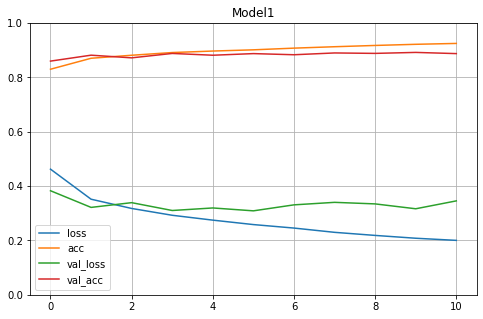

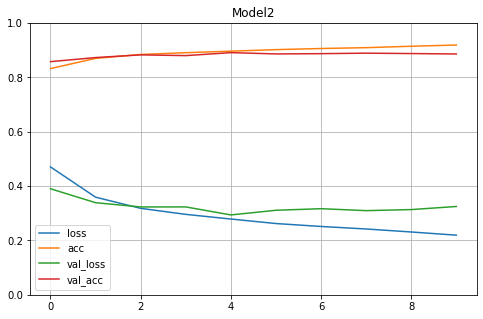

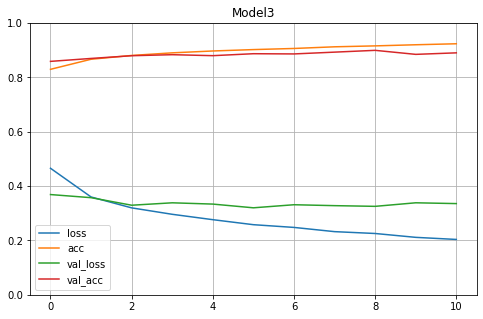

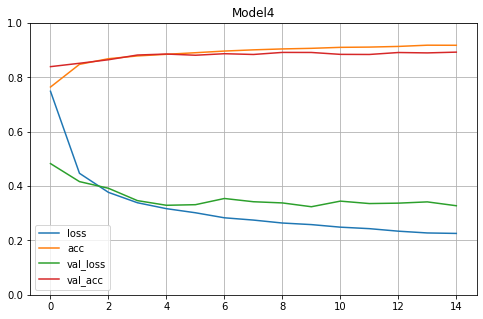

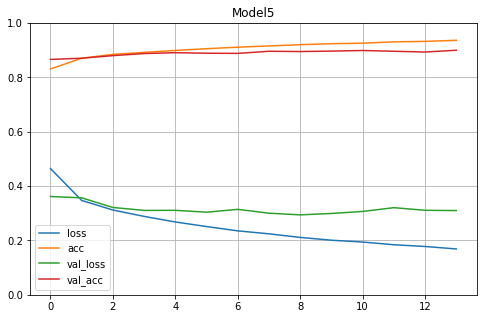

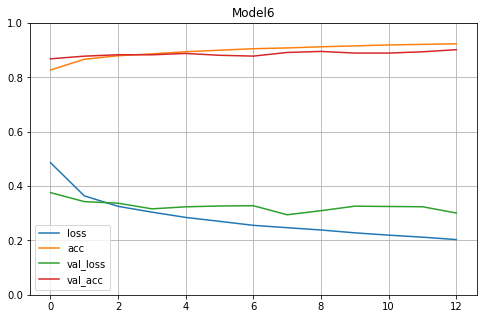

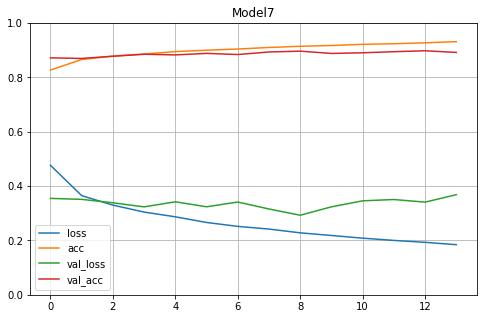

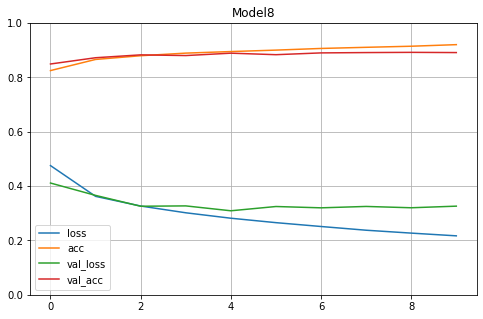

In [9]:
def plot_learning_curves(history, i):
    pd.DataFrame(history.history).plot(figsize=(8,5), title = "Model" + str(i+1))
    plt.grid()
    plt.gca().set_ylim(0,1)
    plt.show()
for i in range(len(histories)):
    plot_learning_curves(histories[i], i)
    plt.show()

============================================

In [10]:
def predictY(model):
    y_pred=model.predict(x_test_scaled)
    predict = np.argmax(y_pred,axis=1) 
    print("predict: {}".format(predict))
    print("y_test: {}".format(y_test))
    #print(y_test)

    aa = [0,0,0,0,0,0,0,0,0,0]
    bb = [0,0,0,0,0,0,0,0,0,0]

    n = 0
    for i in range(len(predict)):
        aa[predict[i]] += 1
        if predict[i] == y_test[i]:
            n += 1
            bb[predict[i]] += 1

    print("aa: {}".format(aa))
    print("bb: {}".format(bb))

    c = []
    for a in range(len(aa)):
        c.append(bb[a]/aa[a])

    print(c)
    return c
    #print(n/len(y_test))
#plt.plot(d,c)

In [11]:
print('=====check=====')
#print('length of result: ' + str(len(result)))
print('length of accs: ' + str(len(accs)))
d = list(range(0,10))

results = []
for i in range(len(models)):
    c = predictY(models[i])
    results.append(c)


=====check=====
length of accs: 8
predict: [9 2 1 ... 8 1 5]
y_test: [9 2 1 ... 8 1 5]
aa: [1131, 968, 1074, 1057, 888, 999, 862, 925, 1014, 1082]
bb: [897, 965, 850, 921, 761, 968, 651, 898, 976, 980]
[0.7931034482758621, 0.996900826446281, 0.7914338919925512, 0.8713339640491958, 0.8569819819819819, 0.968968968968969, 0.7552204176334106, 0.9708108108108108, 0.9625246548323472, 0.9057301293900185]
predict: [9 2 1 ... 8 1 5]
y_test: [9 2 1 ... 8 1 5]
aa: [1069, 983, 976, 1025, 1179, 982, 751, 1070, 988, 977]
bb: [876, 972, 788, 907, 871, 936, 568, 968, 958, 937]
[0.8194574368568756, 0.9888097660223805, 0.8073770491803278, 0.8848780487804878, 0.7387616624257846, 0.9531568228105907, 0.7563249001331558, 0.9046728971962616, 0.9696356275303644, 0.9590583418628454]
predict: [9 2 1 ... 8 1 5]
y_test: [9 2 1 ... 8 1 5]
aa: [1015, 988, 1148, 1075, 809, 1001, 964, 1047, 987, 966]
bb: [847, 973, 857, 925, 692, 967, 695, 972, 954, 940]
[0.8344827586206897, 0.9848178137651822, 0.7465156794425087, 0.

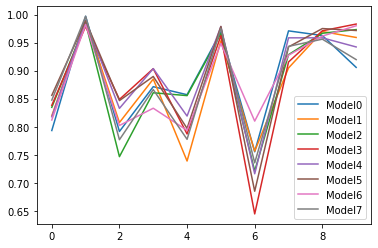

In [12]:

for i in range(len(models)):
    plt.plot(d, results[i], label = 'Model' + str(i))
    
# plt.plot(d, result[1], label = 'model2')
# plt.plot(d, result[2], label = 'model3')
# plt.plot(d, result[3], label = 'model4')
# plt.plot(d, result[4], label = 'model5')
# plt.plot(d, result[5], label = 'model6')
plt.legend()
plt.show()

In [13]:
print(accs)

[0.8866999745368958, 0.8780999779701233, 0.8824999928474426, 0.8795999884605408, 0.890999972820282, 0.8903999924659729, 0.8849999904632568, 0.8791000247001648]
